<a href="https://colab.research.google.com/github/GeorgeMartin2021/Probability_Statistics/blob/main/Martinez_Final_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [36]:
#captures the stdout/stderr of a cell
%%capture
!pip install wandb #build better models faster - weights and biases
!apt-get install poppler-utils #renders PDFs
!pip install pdf2image #convert PDFs to a PIL Image object
!pip install flashtorch #visualization techniques such as saliency maps and activation maximization to help the neural network understand the images
import requests #allows HTTP requests
from pdf2image import convert_from_path #Converts a PDF into image(s) via a path you give it
import matplotlib.pyplot as plt #matplotlib - useful for plotting graphs
import numpy as np #numpy library
import torch # Tensor computation with strong GPU acceleration
import requests #allows HTTP requests
from torchvision import * #efficient Image and Video transformations with pytorch
from torchvision.models import * #efficient Image and Video transformations
from flashtorch.utils import apply_transforms #apply the transformations
import wandb as wb #Weights & Biases - tool for accessing all of your Runs data and displaying, visualizing, or exporting it to external storage

In [37]:
def GPU(data): # python function with a multi-dimensional matrix containing elements of a single data type
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #determines your cuda cores in your GPU for acceleration and uses them for the data
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): # plotting the matrix into a subplot
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #greyscale
    ax.axis('off') #turning the axis off
    fig.set_size_inches(5, 5) #setting the size of the plot in inches
    plt.show() #showing the plot
    
def get_google_slide(url): #python function to grab the google slide presentation URL
    url_head = "https://docs.google.com/presentation/d/" #grabbing the head of the URL
    url_body = url.split('/')[5] #grabbing the body of the URL
    page_id = url.split('.')[-1] #grabbing the page ID of the URL
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #returns the URL we grabbed

def get_slides(url): #python function to grab the contents of the google slides of the URL 
    url = get_google_slide(url) #assigning the URL to a variable
    r = requests.get(url, allow_redirects=True) #assigning the request to get the URL in variable r
    open('file.pdf', 'wb').write(r.content) #once the request ends up being true, it will open the google slide presentation in a PDF
    images = convert_from_path('file.pdf', 500) #this will convert the pdf to an IMAGE and we assign it to images
    return images #return the images

def load(image): #python function to load the image we just grabbed and returning it

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if there is cuda cores available, it will use them if not it'll use the CPU core(s)

In [38]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #grabbing a json file filled with labels

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [39]:
url = "https://docs.google.com/presentation/d/1o3OG-WzMFh3-wi4nZ1A8NBggckjL3xRz5h7Mki3IcrM/edit#slide=id.g1b0e3e645f8_0_245" #assigning my google presentation slide link into URL

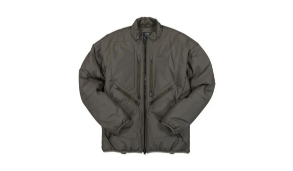

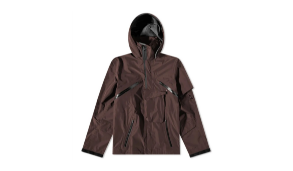

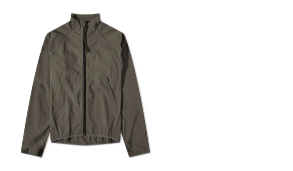

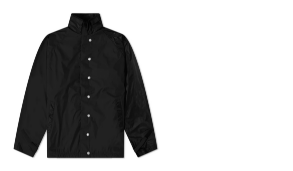

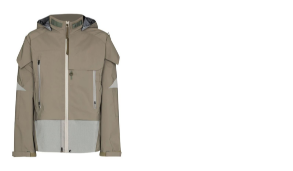

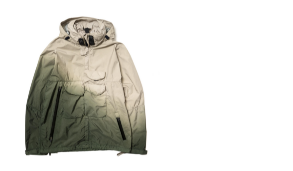

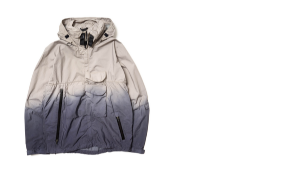

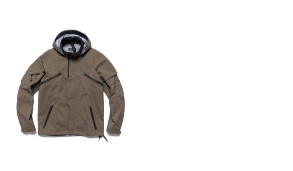

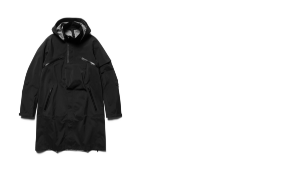

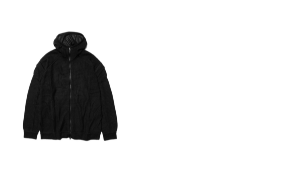

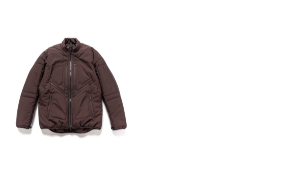

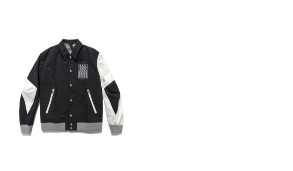

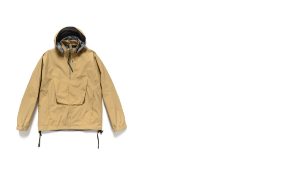

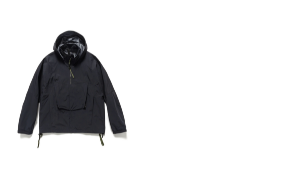

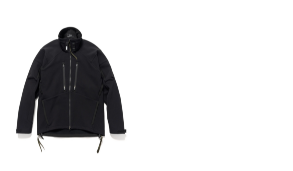

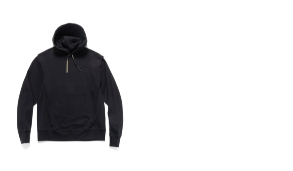

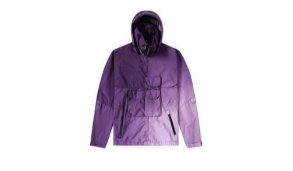

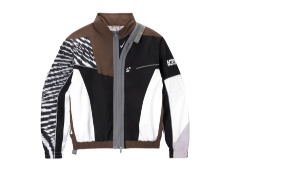

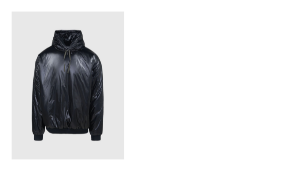

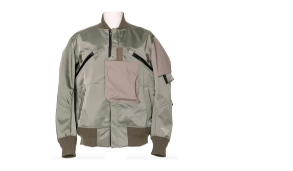

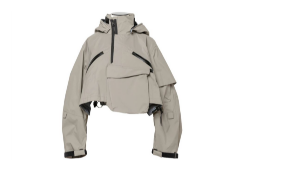

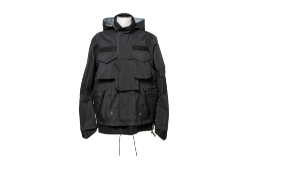

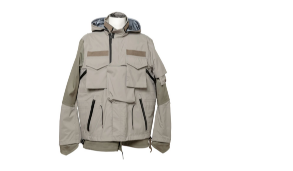

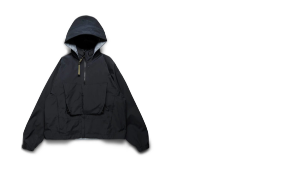

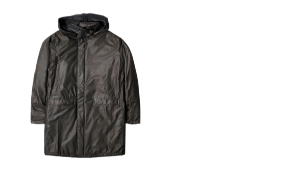

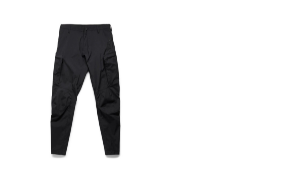

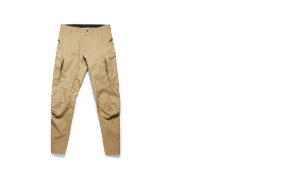

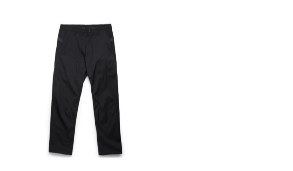

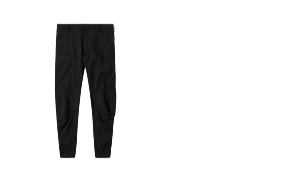

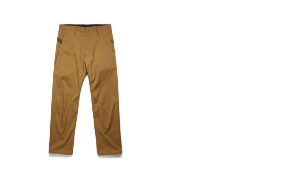

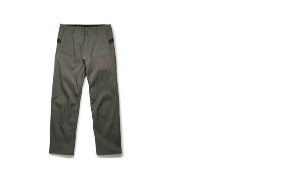

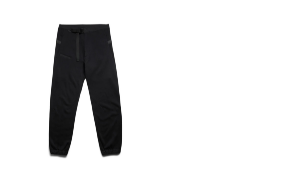

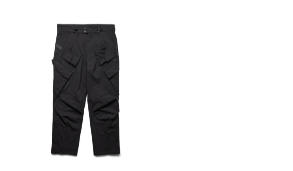

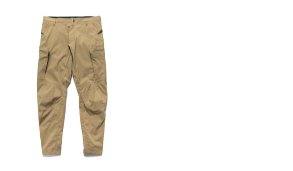

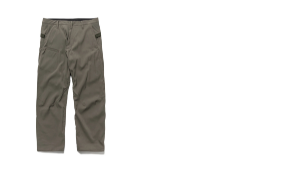

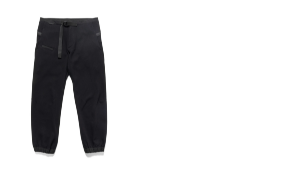

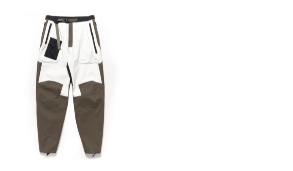

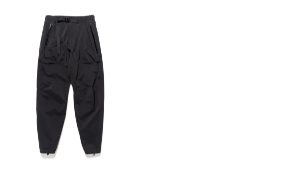

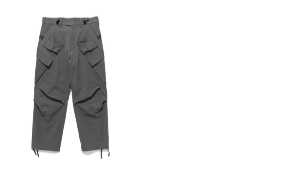

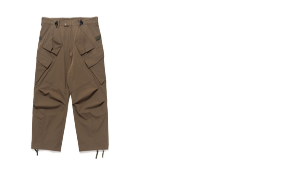

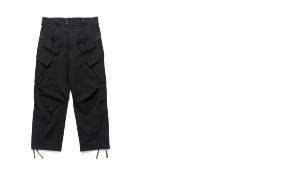

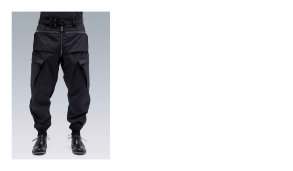

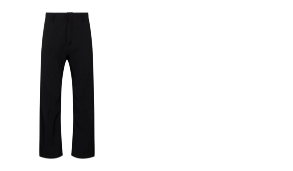

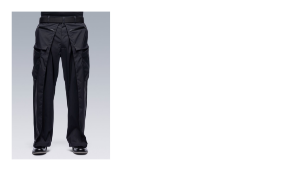

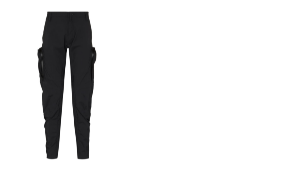

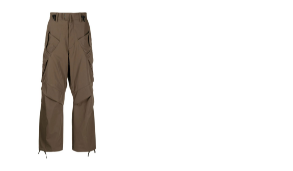

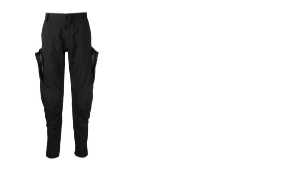

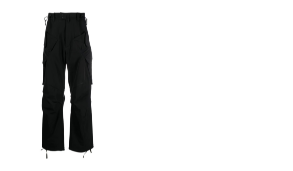

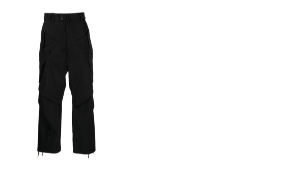

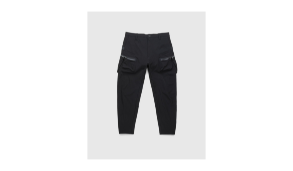

In [40]:
images = [] #assigning images to an empty array

for image in get_slides(url): #for loop to grab the slides from my URL

    plot(image) #plotting these images

    images.append(load(image)) #appending the images from the slides

images = torch.vstack(images) #stacking the images on top of one another similar how they are shown via google slides

In [41]:
images.shape #grabs the shape of the images variable

torch.Size([50, 3, 224, 224])

In [42]:
model(images) #showing the tensor of images

tensor([[ 4.7862, -4.8032, -2.2237,  ..., -5.1793, -0.3606,  2.0346],
        [ 3.8533, -6.1541, -3.2281,  ..., -5.3855, -1.0793, -1.2785],
        [ 2.5098, -3.7182, -2.5612,  ..., -5.5339, -0.9105,  0.4815],
        ...,
        [ 0.4247, -2.7535, -2.9261,  ..., -4.1330, -1.6075,  0.9988],
        [ 0.3855, -2.8379, -2.7545,  ..., -3.9159, -1.6335,  1.0368],
        [-0.4178, -3.3703, -2.8782,  ..., -5.7120, -1.3857,  4.0552]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [43]:
y = model(images) #assigning the tensor to y

In [44]:
y.shape #showing the shape of the tensor that is assigned to y

torch.Size([50, 1000])

In [45]:
guesses = torch.argmax(y, 1).cpu().numpy() #Returns the indices of the maximum value of all elements in the input tensor and it will go off of the cpu

In [46]:
for i in list(guesses): #for loop to print the labels
    print(labels[i])

sweatshirt
trench coat
trench coat
trench coat
bulletproof vest
backpack, back pack, knapsack, packsack, rucksack, haversack
backpack, back pack, knapsack, packsack, rucksack, haversack
whistle
backpack, back pack, knapsack, packsack, rucksack, haversack
abaya
backpack, back pack, knapsack, packsack, rucksack, haversack
reflex camera
trench coat
backpack, back pack, knapsack, packsack, rucksack, haversack
backpack, back pack, knapsack, packsack, rucksack, haversack
sweatshirt
sweatshirt
trench coat
joystick
sweatshirt
backpack, back pack, knapsack, packsack, rucksack, haversack
backpack, back pack, knapsack, packsack, rucksack, haversack
backpack, back pack, knapsack, packsack, rucksack, haversack
backpack, back pack, knapsack, packsack, rucksack, haversack
academic gown, academic robe, judge's robe
jersey, T-shirt, tee shirt
rule, ruler
abaya
swimming trunks, bathing trunks
jersey, T-shirt, tee shirt
swimming trunks, bathing trunks
suit, suit of clothes
swimming trunks, bathing trunks

In [47]:
Y = np.zeros(50,) #assigning Y to return a new array of given shape and type, filled with zeros
Y[25:] = 1 #assigning Y in the 25 value to its end value 50 to have a 1

In [48]:
Y #showing the array of Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
X = y.detach().cpu().numpy() #Returns a new Tensor, detached from the current graph and assigning it to X, using the CPU
X_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [50]:
X.shape #showing the shape of X

(50, 1000)

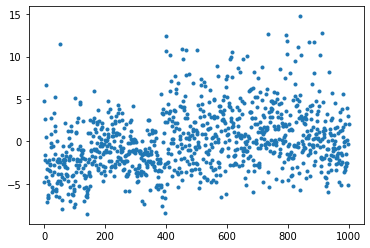

In [51]:
plt.plot(X[0],'.') #showing the plot of X shape

In [52]:
X[0] #printing these values of X shape

array([ 4.78623056e+00, -4.80324268e+00, -2.22374368e+00, -1.64596844e+00,
        2.62478232e+00,  6.61604166e+00,  5.43860018e-01, -4.17990875e+00,
       -2.48139334e+00, -7.20187473e+00, -3.25640178e+00, -6.63114309e+00,
       -4.70556736e+00, -6.34114838e+00, -6.52615738e+00, -3.33720636e+00,
       -2.15186286e+00, -5.07629585e+00, -2.63742924e+00, -3.55105853e+00,
       -2.79680109e+00,  8.37607622e-01, -1.49867117e-01,  2.74971437e+00,
       -6.35494232e-01, -5.35416603e+00, -3.94018245e+00, -5.98506927e+00,
       -5.73081851e-01, -5.74261951e+00, -2.08403993e+00, -3.64760876e+00,
       -2.78823876e+00,  3.34190321e+00,  5.23091698e+00,  1.83871567e+00,
        1.20183706e+00, -1.49164486e+00, -5.88483191e+00, -6.48440981e+00,
       -5.61945963e+00, -2.33784652e+00, -4.88522005e+00,  3.24583054e-02,
       -3.89162445e+00, -2.47820735e+00, -4.63702059e+00, -2.12807202e+00,
       -3.08486366e+00, -6.58169556e+00, -2.12207723e+00,  1.14780159e+01,
       -4.73054314e+00, -

In [53]:
np.argmax(X[0]) #indices of the maximum value of first element in the X tensor

841

In [54]:
labels[948] #showing the label array at value 948

'Granny Smith'

In [55]:
top_ten = np.argsort(X[0])[::-1][0:10] #Perform an indirect sort along the given axis, in this case the top ten regarding my google slides labels

In [56]:
for i in top_ten: #for loop to print the top ten labels
    print(labels[i])

sweatshirt
wool, woolen, woollen
poncho
shower cap
abaya
sleeping bag
trench coat
velvet
triceratops
suit, suit of clothes


In [57]:
labels #printing all the labels from the json data

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 23., 100., 233., 268., 197., 107.,  36.,  16.,  16.,   4.]),
 array([-8.563169 , -6.2318864, -3.9006045, -1.5693223,  0.7619597,
         3.0932417,  5.424524 ,  7.755806 , 10.087088 , 12.41837  ,
        14.749652 ], dtype=float32),
 <a list of 10 Patch objects>)

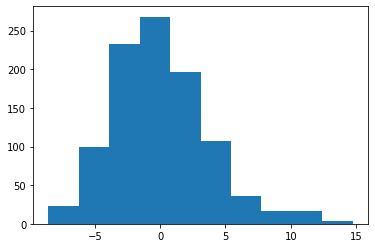

In [58]:
plt.hist(X[0]) #plotting the histogram of X array

In [84]:
X = GPU_data(X) #determining your cuda cores in your GPU for acceleration and uses them for the data array X. assigning it to X
Y = GPU_data(Y) #determines your cuda cores in your GPA for acceleration and uses them for the data array Y. Assigning it to Y

<ipython-input-37-bec0a8d75862>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [60]:
def softmax(x): #mathematical function that converts a vector of numbers into a vector of probabilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s #returns the softmax in variable s

In [61]:
def cross_entropy(outputs, labels):     #compares each of the predicted probabilities to actual class output which can be either 0 or 1        
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [62]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [63]:
def Truncated_Normal(size): #python function assigning formulas to these variables based on the size of the data array -probability distribution derived from that of a normally distributed random variable by bounding the random variable

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z #returns only z variable

In [64]:
def acc(out,y):
    with torch.no_grad(): #Disabling gradient calculation
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [65]:
X.shape #showing the shape of X array

torch.Size([50, 1000])

In [79]:
def get_batch(mode):
    b = c.b #batch size is assigned to b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) #creating an array based on the shape of X and making random values
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b) #creating an array based on the shape of X_test and making random values
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y #returning x,y values

In [80]:
def model(x,w): #python function of model x @ w

    return x@w[0] #returning the model x@w at the first value

In [81]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [108]:
wb.init(project="Martinez_Final_Stats");
c = wb.config

c.h = 0.001 #descend Gradient Slowly to Not Overshoot Minima and Oscillate
c.b = 32 #batch size
c.epochs = 100000 #number of epochs used

w = [GPU(Truncated_Normal((1000,2)))] #grabbing the truncated normal numbers and assigning them to w

optimizer = torch.optim.Adam(w, lr=c.h)  #Implements Adam algorithm

for i in range(c.epochs): #for loop using the amount of epochs

    x,y = get_batch('train') #gets the batch from train array

    loss = cross_entropy(softmax(model(x,w)),y) #log loss of softmax activation layer

    optimizer.zero_grad() #Sets the gradients of all optimized torch.Tensor s to zero
    loss.backward() #Computes the gradient of log loss tensor graph
    optimizer.step() #Performs a single optimization step (parameter update)
   
    wb.log({"loss": loss}) #logging the log loss

    make_plots() #makes the plots


<ipython-input-37-bec0a8d75862>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


TypeError: ignored

https://tensorspace.org/